In [1228]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import make_blobs

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
from astroquery.simbad import Simbad
import numpy as np

In [1229]:
## First I want to read in all the data 

data = pd.read_csv('/Users/loggy/Desktop/Astr519_Homework/ASTR519Project/MWSC Catalogue - Sheet1.csv')

lii = data['lii']
bii = data['bii']
ra = data['ra']
dec = data['dec']
core_radius = data['core_radius']
num_core_stars = data['num_core_stars']
distance = data['distance']
reddening = data['e_bv']
log_age = data['log_age']
metallicity = data['metallicity']
classification = data['class']

cluster_data_matrix = []
cluster_age_matrix = []
## Populate the data matrix 

sourceLength = len(metallicity)

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [lii[i], bii[i], ra[i], dec[i], core_radius[i], num_core_stars[i], distance[i], reddening[i], metallicity[i]]
            cluster_data_matrix.append(tempList)
            cluster_age_matrix.append(log_age[i])




In [1230]:
## Now that we have our data cluster matrix we can do stuff with it!! 

## First we will start with training stuff

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix, cluster_age_matrix, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.524682481898466


In [1231]:
## that was neat and also the error was not too bad i think (might have to check if we have to change it from log or not but I believe not)

## Now we can test removing variables

# what if we removed ra, dec, distance, lii, bii, and reddening

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [core_radius[i], num_core_stars[i], metallicity[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

# why is it sorta worse, maybe galactic coordinates are at play here due to a trend stemming from virialization, lets try this again

Mean Squared Error: 0.5548378114802434


In [1232]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

 ## Maybe latitude helped a bit

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [bii[i], core_radius[i], num_core_stars[i], metallicity[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

## definitley better than before but not as good as we want

Mean Squared Error: 0.39373906991518104


In [1233]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [bii[i], core_radius[i], num_core_stars[i], metallicity[i], distance[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

# adding distance in made that way better wtf

Mean Squared Error: 0.3594464498422062


In [1234]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [metallicity[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

# metallicity does ok on its own 

Mean Squared Error: 0.5587428655855678


In [1235]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [distance[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

##oddly enough there seems to be some strong coorellation between age ans distance???????

Mean Squared Error: 0.26253943798515084


In [1236]:
## Now, not too many of these stars had metallicity values, so lets try to expand our set

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []


for i in range(sourceLength):
    if np.isnan(lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [lii[i], bii[i], ra[i], dec[i], core_radius[i], num_core_stars[i], distance[i], reddening[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5525504561014976


In [1237]:
## Now, not too many of these stars had metallicity values, so lets try to expand our set by removing metallicity as a parameter

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []


for i in range(sourceLength):
    if np.isnan(lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [lii[i], bii[i], core_radius[i], num_core_stars[i], reddening[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)
# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 0.5461704250223727


In [1238]:
## Now, not too many of these stars had metallicity values, so lets try to expand our set

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []


for i in range(sourceLength):
    if np.isnan(lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [distance[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = DecisionTreeRegressor(max_depth=5)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

## Ok at least this is worse now

Mean Squared Error: 0.70182082983797


In [1239]:
## Now lets try it with random forest

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'OPEN STAR CLUSTER':
            tempList = [lii[i], bii[i], ra[i], dec[i], core_radius[i], num_core_stars[i], distance[i], reddening[i], metallicity[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

# Random forest seems to offer slightly better results

Mean Squared Error: 0.3407377850698875


In [1240]:
## Lets try with globs now

cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []

for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC':
            tempList = [lii[i], bii[i], ra[i], dec[i], core_radius[i], num_core_stars[i], distance[i], reddening[i], metallicity[i]]
            cluster_data_matrix_supreme.append(tempList)
            cluster_age_matrix_supreme.append(log_age[i])
print(len(cluster_age_matrix_supreme))

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')

##sorta sucks since all of them are around the same age

147
Mean Squared Error: 0.002161135135135197


147
Mean Squared Error: 0.0034560838726175004


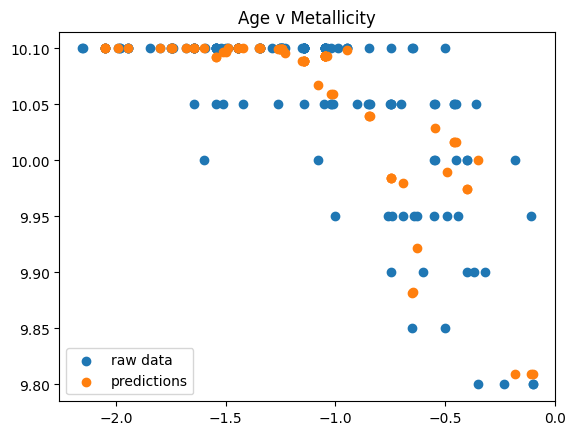

In [1255]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []
metallicityNumbers = []
for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC':
            cluster_data_matrix_supreme.append([metallicity[i]])
            metallicityNumbers.append(metallicity[i])
            cluster_age_matrix_supreme.append(log_age[i])
print(len(cluster_age_matrix_supreme))

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')
plt.title('Age v Metallicity')
plt.scatter(metallicityNumbers, cluster_age_matrix_supreme, label='raw data')
plt.scatter(cluster_test, predictions, label='predictions')
plt.legend()
plt.show()
##metallicity alone does provide the best fit so far, other useless parameters are tyipcally in the rmse range of 0.008 and metallicity consistenly gives around 0.002-3

In [ ]:
cluster_data_matrix_supreme = []
cluster_age_matrix_supreme = []
latNumbers = []
for i in range(sourceLength):
    if np.isnan(metallicity[i] or lii[i] or bii[i] or ra[i] or dec[i] or core_radius[i] or num_core_stars[i] or distance[i] or reddening[i] or log_age[i]) == False:
        if classification[i] == 'GLOBULAR CLUSTER EXTENDED GALACTIC OR EXTRAGALACTIC':
            cluster_data_matrix_supreme.append([bii[i]])
            latNumbers.append(bii[i])
            cluster_age_matrix_supreme.append(log_age[i])
print(len(cluster_age_matrix_supreme))

cluster_train, cluster_test, age_train, age_test = train_test_split(cluster_data_matrix_supreme, cluster_age_matrix_supreme, test_size=0.5)

# Create a decision tree regressor
model = RandomForestRegressor(max_depth=10, n_estimators=100)

# Train the model
model.fit(cluster_train, age_train)

# Make predictions on the test set
predictions = model.predict(cluster_test)

mse = mean_squared_error(age_test, predictions)
# print(age_test)
# print(predictions)
print(f'Mean Squared Error: {mse}')
plt.title('Age v Metallicity')
plt.scatter(latNumbers, cluster_age_matrix_supreme, label='raw data')
plt.scatter(cluster_test, predictions, label='predictions')
plt.legend()
plt.show()